In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from sklearn.gaussian_process import GaussianProcessRegressor

# Guide and Ideas for Capstone Project

We begin this guide by downloading the data:

In [2]:
X = np.load('updated_data/function_7/inputs.npy')
Y = np.load('updated_data/function_7/outputs.npy')

# Upper Confidence Bound

A second alternative would be to use Bayesian Optimization and consider an Upper Confidence Bound acquisition function: 

In [3]:
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

GaussianProcessRegressor()

## Visualizing our data and thinking of the problem

Text(0.5, 1.0, 'X6')

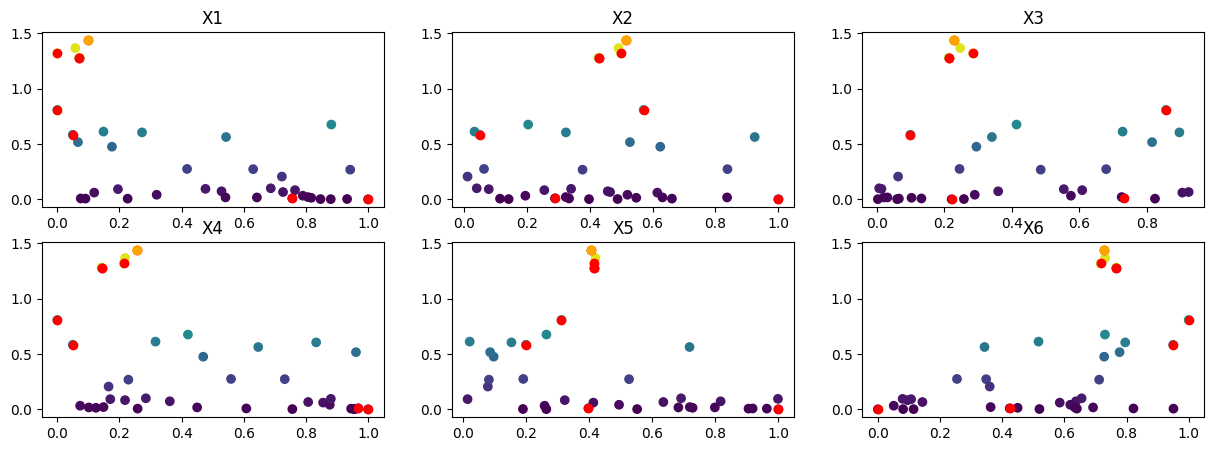

In [4]:
fig, ((ax1, ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.scatter(X[:, 0], Y, c = Y)
ax2.scatter(X[:,1], Y, c = Y)
ax3.scatter(X[:,2], Y, c = Y)
ax4.scatter(X[:,3], Y, c = Y)
ax5.scatter(X[:,4], Y, c = Y)
ax6.scatter(X[:,5], Y, c = Y)

from shared import Count_Submissions
ax1.scatter(X[Count_Submissions():, 0], Y[Count_Submissions():], c = 'red')
ax2.scatter(X[Count_Submissions():,1], Y[Count_Submissions():], c = 'red')
ax3.scatter(X[Count_Submissions():,2], Y[Count_Submissions():], c = 'red')
ax4.scatter(X[Count_Submissions():,3], Y[Count_Submissions():], c = 'red')
ax5.scatter(X[Count_Submissions():,4], Y[Count_Submissions():], c = 'red')
ax6.scatter(X[Count_Submissions():,5], Y[Count_Submissions():], c = 'red')

ax1.scatter(X[-1:, 0], Y[-1:], c = 'orange')
ax2.scatter(X[-1:,1], Y[-1:], c = 'orange')
ax3.scatter(X[-1:,2], Y[-1:], c = 'orange')
ax4.scatter(X[-1:,3], Y[-1:], c = 'orange')
ax5.scatter(X[-1:,4], Y[-1:], c = 'orange')
ax6.scatter(X[-1:,5], Y[-1:], c = 'orange')

ax1.set_title("X1")
ax2.set_title("X2")
ax3.set_title("X3")
ax4.set_title("X4")
ax5.set_title("X5")
ax6.set_title("X6")


In [5]:
x1 = np.linspace(0,0.2,15)
x2 = np.linspace(0.4,0.6,15)
x3 = np.linspace(0.2,0.4,15)
x4 = np.linspace(0,0.3,15)
x5 = np.linspace(0.4,0.5,15)
x6 = np.linspace(0.6,0.8,15)
grid = np.meshgrid(x1, x2, x3,x4,x5,x6)
grid = np.array(grid).T.reshape(-1,6)

In [6]:
from shared import FormatOutputs, ProbImprovementAF

X_grid = np.array(grid)
mean, std = gpr.predict(X_grid, return_std = True)
ucb = mean + 1.96 * std
pi = ProbImprovementAF(mean,std,np.max(Y))

#ucb
idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
FormatOutputs(next_query, "ucb")

#probability of improvemnet
idx_max = np.argmax(pi)
next_query = X_grid[idx_max]
FormatOutputs(next_query, "prob of improvement")

0.000001-0.600000-0.200000-0.214286-0.400000-0.600000: ucb
0.071429-0.557143-0.200000-0.278571-0.400000-0.700000: prob of improvement
